In [1]:
# Reading data

import pandas as pd
matches = pd.read_csv('fifa.csv')
matches.shape

(23921, 25)

In [2]:
matches.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# A function to get some info from the columns

def info(df):
    
    variables = []
    data_types = []
    count = []
    unique = []
    missing_values = []
    
    for item in df.columns:
        variables.append(item)
        data_types.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing_values.append(df[item].isna().sum())
        
    output = pd.DataFrame({
        'variable': variables, 
        'data type': data_types,
        'count': count,
        'unique': unique,
        'missing values': missing_values
    })    
        
    return output

In [4]:
info(matches)

,variable,data type,count,unique,missing values
0,date,object,23921,5550,0
1,home_team,object,23921,211,0
2,away_team,object,23921,211,0
3,home_team_continent,object,23921,6,0
4,away_team_continent,object,23921,6,0
5,home_team_fifa_rank,int64,23921,211,0
6,away_team_fifa_rank,int64,23921,211,0
7,home_team_total_fifa_points,int64,23921,1686,0
8,away_team_total_fifa_points,int64,23921,1679,0
9,home_team_score,int64,23921,21,0


In [5]:
# Get total percentage of missing values

import numpy as np
percent_missing = matches.isnull().sum().sum() / np.product(matches.shape) * 100
percent_missing

21.166339199866226

In [6]:
## pre processing
matches["date"] = pd.to_datetime(matches["date"])
matches = matches.replace({'shoot_out': {'Yes': True, 'No': False}})


In [7]:
world_cup_teams = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 'England', 'USA', 'IR Iran', 'Wales',
                   'Argentina', 'Mexico', 'Poland', 'Saudi Arabia', 'France', 'Denmark', 'Tunisia', 'Australia',
                   'Spain', 'Germany', 'Japan', 'Costa Rica', 'Belgium', 'Croatia', 'Morocco', 'Canada',
                   'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 'Portugal', 'Uruguay', 'Korea Republic', 'Ghana']

In [8]:
# Removing irrelevant matches


matches = matches[((matches['home_team'].isin(world_cup_teams) & matches['away_team'].isin(world_cup_teams)) |
                   (matches['home_team'].isin(world_cup_teams) & (matches['away_team_fifa_rank'] <= 100)) |
                   ((matches['home_team_fifa_rank'] <= 100) & matches['away_team'].isin(world_cup_teams))|
                   ((matches['home_team_fifa_rank'] <= 50) & (matches['away_team_fifa_rank'] <= 50)))]
matches.reset_index(drop=True, inplace=True)
matches.shape

(8653, 25)

In [9]:
# Remove duplicate rows

matches.duplicated().sum()

0

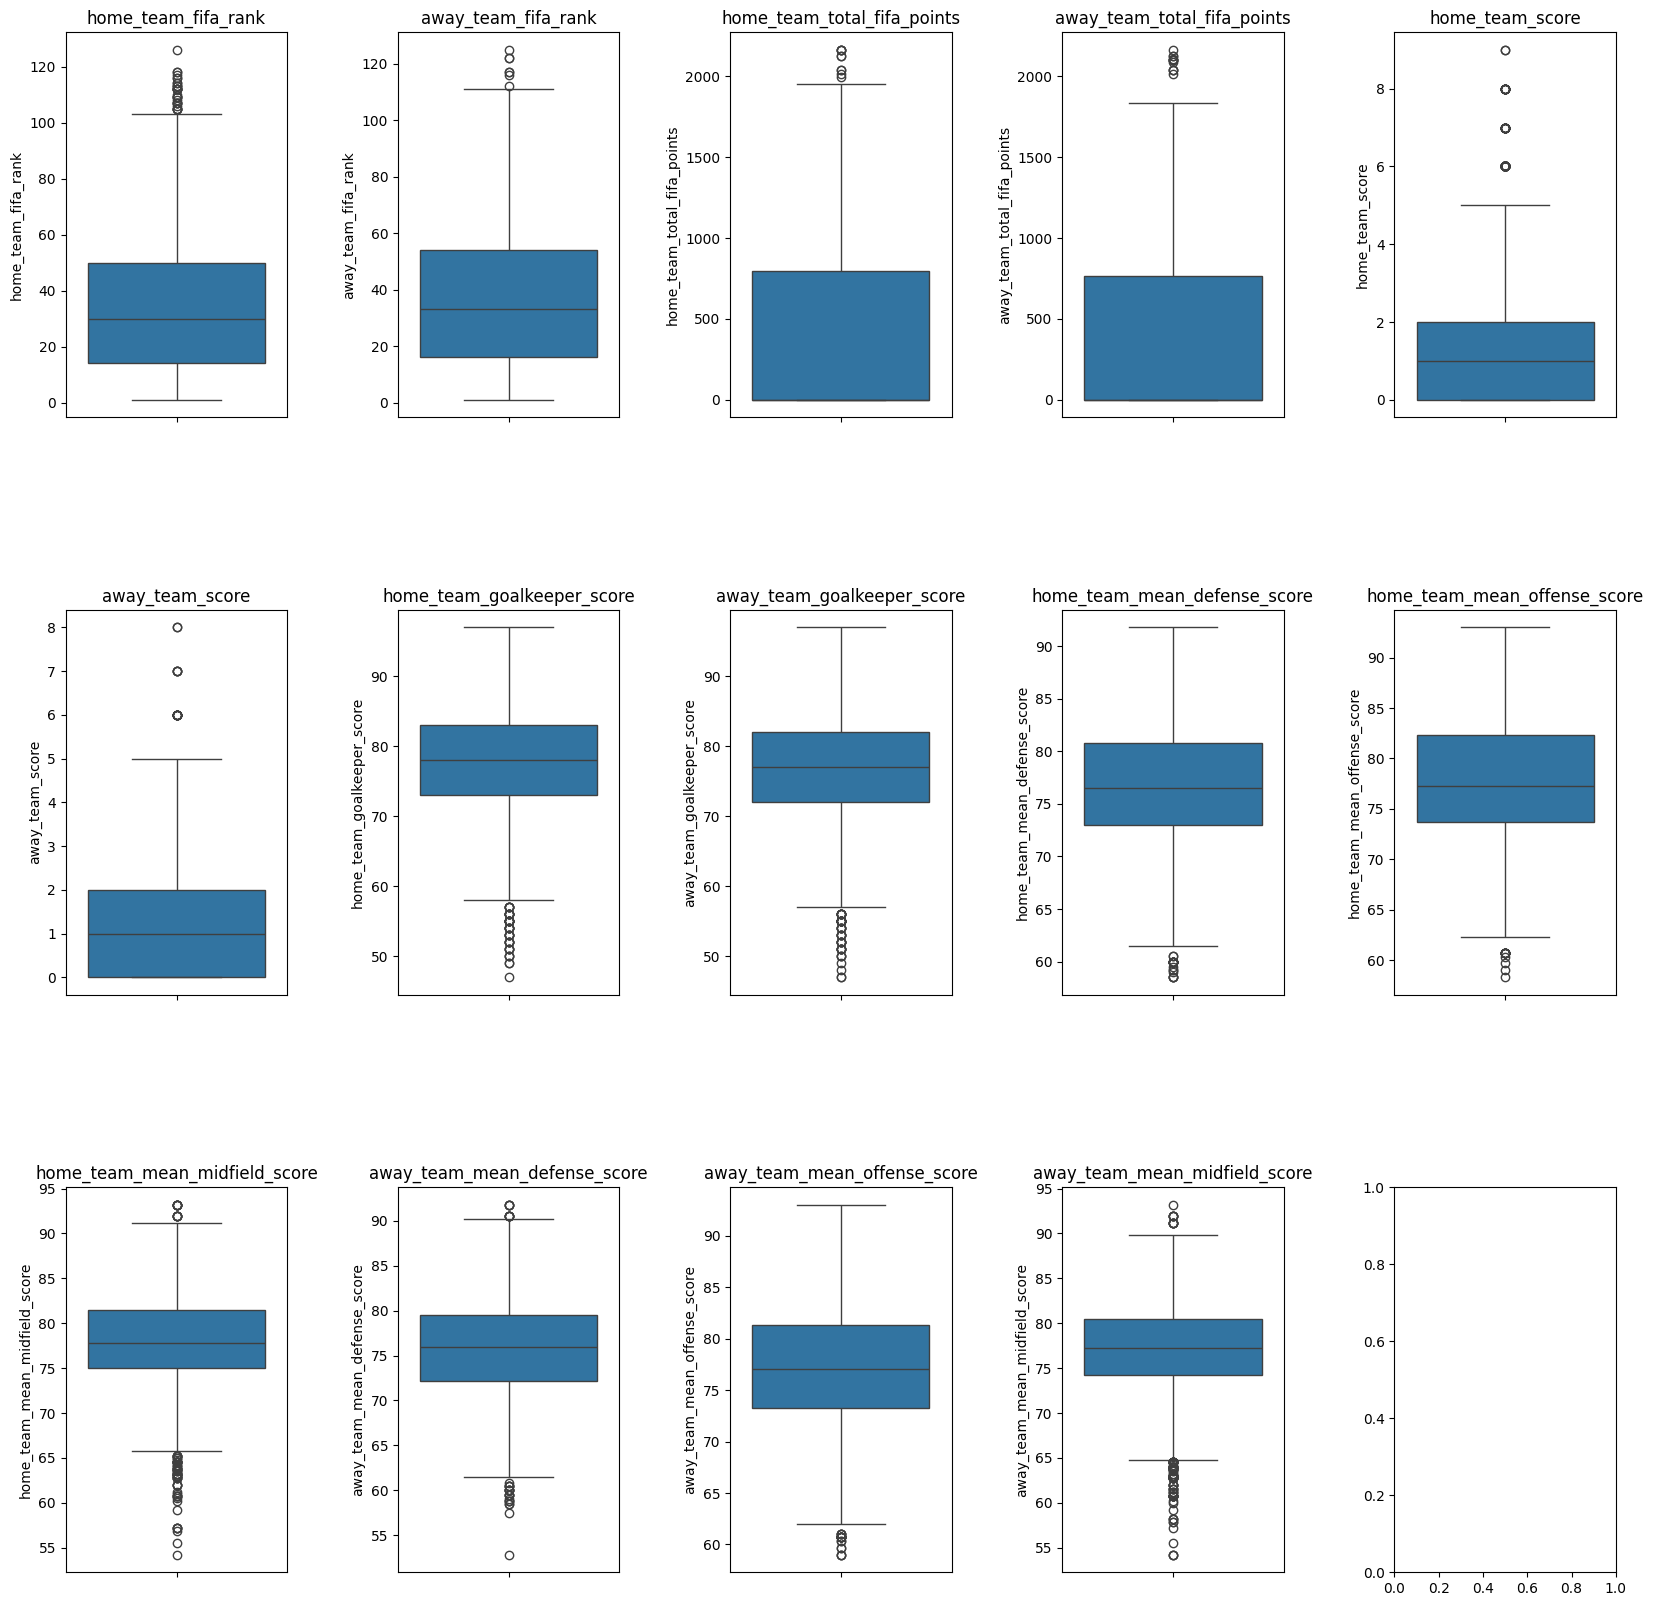

In [10]:
#  Check for Outliers of numerical variables

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
numeric_cols = matches.select_dtypes(include='number').columns

for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_cols):
        sns.boxplot(y=matches[numeric_cols[i]], ax=ax)
        ax.set_title(numeric_cols[i])
    else:
        break

plt.show()

In [11]:
# Creating features for training

matches["goal_difference"] = matches["home_team_score"] - matches["away_team_score"]
matches["rank_difference"] = matches["home_team_fifa_rank"] - matches["away_team_fifa_rank"]
matches['Friendly'] = matches['tournament'] == 'Friendly'
matches['year'] = matches['date'].dt.year

In [12]:
# Setting input and output varibles
# Positive goal difference shows that the home team has won the game.
# Negative goal differnce is indicative of away team victory.

matches_X = matches[['home_team_total_fifa_points', 'away_team_total_fifa_points', 'rank_difference', 'Friendly', 'year']]
matches_y = matches[['goal_difference']]

In [16]:
# Training
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_array = np.array(matches_y)
y_array = y_array.ravel()
scores = cross_val_score(random_forest_model, matches_X, y_array, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

RMSE Scores: [1.91672588 1.91251556 1.92024504 1.91067573 1.82232736 1.83980999
 1.80292644 1.78079096 1.72987706 1.71241866]
Mean RMSE: 1.8348312657399652


In [18]:
# Greedy Approach
random_forest_model = RandomForestRegressor(n_estimators = 50, max_depth = 5, min_samples_split = 2, min_samples_leaf = 4)
y_array = np.array(matches_y)
y_array = y_array.ravel()
scores = cross_val_score(random_forest_model, matches_X, y_array, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

RMSE Scores: [1.63525493 1.70043527 1.73521938 1.61359468 1.61139315 1.58264025
 1.62675517 1.646634   1.64043645 1.59998039]
Mean RMSE: 1.6392343670346556


In [19]:
# Training the model

random_forest_model.fit(matches_X, y_array)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=50)

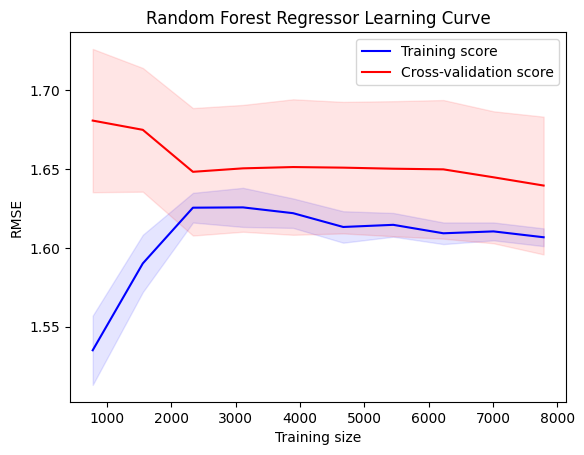

In [20]:
# Learning Curve

from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, test_scores = learning_curve(
    random_forest_model, matches_X, y_array, train_sizes=train_sizes, cv=10, scoring='neg_root_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes_abs, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.title('Random Forest Regressor Learning Curve')
plt.xlabel('Training size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()

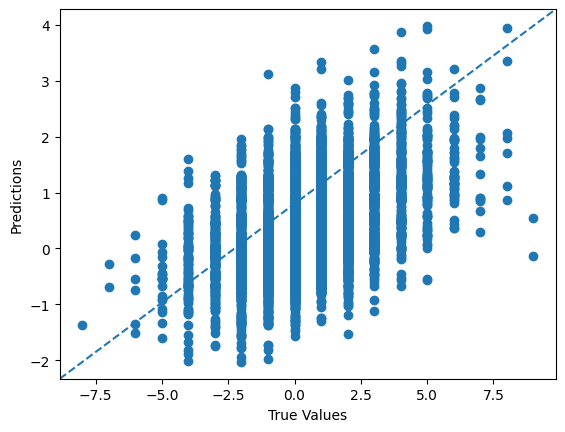

In [21]:
# Model prediction

y_pred = random_forest_model.predict(matches_X)
plt.scatter(matches_y, y_pred)
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [22]:
world_cup_groups = {'A': ['Qatar', 'Netherlands', 'Senegal', 'Ecuador'],
                    'B': ['England', 'USA', 'IR Iran', 'Wales'],
                    'C': ['Argentina', 'Mexico', 'Poland', 'Saudi Arabia'],
                    'D': ['France', 'Denmark', 'Tunisia', 'Australia'],
                    'E': ['Spain', 'Germany', 'Japan', 'Costa Rica'],
                    'F': ['Belgium', 'Croatia', 'Morocco', 'Canada'],
                    'G': ['Brazil', 'Switzerland', 'Serbia', 'Cameroon'],
                    'H': ['Portugal', 'Uruguay', 'Korea Republic', 'Ghana']}

In [23]:
team_info = []
for team in world_cup_teams:
  filtered_matches = matches[(matches['home_team'] == team) | (matches['away_team'] == team)]
  sorted_matches = filtered_matches.sort_values('date', ascending=False)
  if sorted_matches.iloc[0]['home_team'] == team:
    info = (team, sorted_matches.iloc[0]['home_team_total_fifa_points'], sorted_matches.iloc[0]['home_team_fifa_rank'])
  else:
    info = (team, sorted_matches.iloc[0]['away_team_total_fifa_points'], sorted_matches.iloc[0]['away_team_fifa_rank'])
  team_info.append(info)

In [24]:
team_info_df = pd.DataFrame(team_info, columns=['team', 'point', 'rank'])

In [25]:
import itertools
FWC_matches = []

for group, teams in world_cup_groups.items():
    team_combinations = list(itertools.combinations(teams, 2))
    for team in team_combinations:
        team0_point = team_info_df.loc[team_info_df['team'] == team[0], 'point'].values[0]
        team1_point = team_info_df.loc[team_info_df['team'] == team[1], 'point'].values[0]
        team0_rank = team_info_df.loc[team_info_df['team'] == team[0], 'rank'].values[0]
        team1_rank = team_info_df.loc[team_info_df['team'] == team[1], 'rank'].values[0]
        mt = (team0_point, team1_point, team0_rank - team1_rank, False, 2022)
        FWC_matches.append(mt)

In [26]:
FWC_matches_df = pd.DataFrame(FWC_matches, columns=['home_team_total_fifa_points', 'away_team_total_fifa_points',
                                                    'rank_difference', 'Friendly', 'year'])


In [27]:
random_forest_model.predict(FWC_matches_df)

array([-0.64161659, -0.53046751,  0.34745635,  0.46581941,  1.58223208,
        1.03204287,  0.32498177,  1.50002455,  0.66451615,  0.4537834 ,
        0.42299407,  0.20326269,  0.23398456,  2.17196215,  1.80377185,
        1.35584169,  1.83958046,  0.62881941,  0.24933209,  1.59104545,
        1.81024019,  1.71230142,  1.45661517,  0.3769134 ,  0.22105752,
        1.28901319,  1.79483814,  0.45974503,  1.50803648,  0.29488659,
        1.31537601,  2.25503359,  1.58604821,  0.45604062,  0.79595121,
        0.53856361,  0.6974598 ,  2.36586317,  1.58389502,  0.48725949,
        1.47278068,  0.43786741,  0.2538518 ,  1.89519117,  2.36270636,
        1.57423345,  1.93453432,  1.21580209])